- Protected attribute (S) is binary, so we replace all values that aren't AA to 1 value. Ex. AA = 0, the rest = 1


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

raw_scores = pd.read_csv("compas-scores-raw.csv")

display(raw_scores)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [2]:
RFA = raw_scores[raw_scores["DisplayText"] == "Risk of Failure to Appear"].index
ROV = raw_scores[raw_scores["DisplayText"] == "Risk of Violence"].index

raw_scores.drop(RFA, inplace=True)
raw_scores.drop(ROV, inplace=True)

In [3]:
raw_scores = raw_scores.dropna(subset=['ScoreText'], axis=0, how='any')
display(raw_scores)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,8,Risk of Recidivism,0.18,8,High,New,1,0
10,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,8,Risk of Recidivism,-0.53,6,Medium,New,1,0
13,50839,57162,51945,PRETRIAL,McLaurin,Stephanie,Nicole,Female,African-American,06/29/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.55,2,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,79656,72031,PRETRIAL,PENA,ROLANDO,N,Male,Hispanic,06/13/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,2,Medium,8,Risk of Recidivism,-0.42,5,Medium,New,1,0
60832,19968,39866,36500,PRETRIAL,BUTTERFIELD,JAMES,MICHAEL,Male,Caucasian,09/24/73,22,Risk and Prescreen,Intake,English,Post Sentence,Probation,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.36,5,Medium,New,1,0
60835,68598,79660,72035,PRETRIAL,SUAREZ,ANDERSON,NaN,Male,Caucasian,08/10/81,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-1.57,1,Low,New,1,0
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0


In [4]:
"""compas_target = raw_scores['ScoreText'] 
display(compas_target)"""

"compas_target = raw_scores['ScoreText'] \ndisplay(compas_target)"

In [5]:
x_compas = raw_scores.drop(columns=["DateOfBirth", "Scale_ID", "Screening_Date", "ScaleSet_ID", "RecSupervisionLevel", "DecileScore", "LastName", "FirstName", "MiddleName", "DisplayText", "IsCompleted", "IsDeleted", "AssessmentID", "Case_ID", "RawScore"])

#for now ScoreText is not dropped yet (so it's still in the data since we equalize groups)!!

display(x_compas)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
1,50844,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,Low,New
4,50848,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,Low,Low,New
7,50855,PRETRIAL,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,High,High,New
10,50850,PRETRIAL,Female,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,Medium,Medium,New
13,50839,PRETRIAL,Female,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,Low,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,PRETRIAL,Male,Hispanic,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Medium,Medium,New
60832,19968,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Post Sentence,Probation,Single,Low,Medium,New
60835,68598,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,Low,New
60838,65667,Probation,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Medium with Override Consideration,High,New


In [6]:
cleanup_nums_fair = {"Agency_Text": {"PRETRIAL":1, "Probation":2, "DRRD":3, "Broward County":4},
                "Sex_Code_Text": {"Male":1, "Female":2},
                "Ethnic_Code_Text": {"African-American":1, "African-Am":1, "Caucasian":2, "Hispanic":2, "Asian":2, "Native American":2, "Arabic":2, "Oriental":2, "Other":2},
                "ScaleSet": {"Risk and Prescreen":1, "All Scales":2},
                "AssessmentReason": {"Intake":1},
                "Language": {"English":1, "Spanish":2},
                "LegalStatus": {"Pretrial":1, "Post Sentence":2, "Conditional Release":3, "Probation Violator":4, "Parole Violator":5, "Deferred Sentencing":6, "Other":7},
                "CustodyStatus": {"Jail Inmate":1, "Probation":2, "Pretrial Defendant":3, "Residential Program":4, "Parole":5, "Prison Inmate":6},
                "MaritalStatus": {"Single":1, "Married":2, "Divorced":3, "Separated":4, "Significant Other":5, "Widowed":6, "Unknown":7},
                "RecSupervisionLevelText": {"Low":1, "Medium":2, "Medium with Override Consideration":3, "High":4},
                "AssessmentType": {"New":1, "Copy":2}}

x_compas = x_compas.replace(cleanup_nums_fair)
display(x_compas)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
1,50844,1,1,2,1,1,1,1,1,1,1,Low,1
4,50848,1,1,2,1,1,1,1,1,2,1,Low,1
7,50855,1,1,1,1,1,1,1,1,1,4,High,1
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,2,1,1,1,1,1,1,2,Medium,1
60832,19968,1,1,2,1,1,1,2,2,1,1,Medium,1
60835,68598,1,1,2,1,1,1,1,1,1,1,Low,1
60838,65667,2,1,1,1,1,1,1,1,1,3,High,1


In [7]:
x_compas["Ethnic_Code_Text"].value_counts()

2    11235
1     9010
Name: Ethnic_Code_Text, dtype: int64

# Fair Approach

In [8]:
x_compas_other = x_compas[x_compas["Ethnic_Code_Text"] == 2]

In [9]:
x_compas_other_sample = x_compas_other.sample(n=9010)
display(x_compas_other)
display(x_compas_other_sample)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
1,50844,1,1,2,1,1,1,1,1,1,1,Low,1
4,50848,1,1,2,1,1,1,1,1,2,1,Low,1
16,50852,1,1,2,1,1,1,1,1,1,3,High,1
19,50840,1,2,2,1,1,1,1,1,1,1,Low,1
25,50847,1,1,2,1,1,1,1,1,2,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60826,68608,1,1,2,1,1,1,1,1,1,1,Medium,1
60829,68595,1,1,2,1,1,1,1,1,1,2,Medium,1
60832,19968,1,1,2,1,1,1,2,2,1,1,Medium,1
60835,68598,1,1,2,1,1,1,1,1,1,1,Low,1


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
14674,49551,1,2,2,1,1,1,1,1,1,4,High,2
23476,57568,2,1,2,1,1,1,2,2,1,1,Medium,1
32197,33539,2,1,2,1,1,1,2,2,3,1,Low,1
802,51059,1,1,2,1,1,1,1,1,1,1,Medium,1
53491,66415,1,1,2,1,1,1,1,3,6,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39826,62449,2,1,2,1,1,1,2,2,1,2,Medium,1
32608,60327,2,2,2,1,1,1,2,2,1,1,Low,1
8944,53416,2,2,2,1,1,1,2,2,1,2,Medium,1
10813,53969,2,1,2,1,1,1,2,2,1,1,Low,1


In [10]:
CO = x_compas_other.index
x_compas.drop(CO, inplace=True)

display(x_compas)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
7,50855,1,1,1,1,1,1,1,1,1,4,High,1
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1
22,50853,1,1,1,1,1,1,1,1,1,3,High,1
31,50843,1,1,1,1,1,1,1,1,1,3,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60805,62296,1,1,1,1,1,1,1,1,1,1,Low,1
60808,45932,1,1,1,1,1,1,1,3,1,3,High,2
60811,24873,1,1,1,1,1,1,1,1,1,4,High,2
60817,44498,1,1,1,2,1,1,2,2,1,3,High,2


In [11]:
x_compas_new = pd.concat([x_compas, x_compas_other_sample])
display(x_compas_new)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
7,50855,1,1,1,1,1,1,1,1,1,4,High,1
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1
22,50853,1,1,1,1,1,1,1,1,1,3,High,1
31,50843,1,1,1,1,1,1,1,1,1,3,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39826,62449,2,1,2,1,1,1,2,2,1,2,Medium,1
32608,60327,2,2,2,1,1,1,2,2,1,1,Low,1
8944,53416,2,2,2,1,1,1,2,2,1,2,Medium,1
10813,53969,2,1,2,1,1,1,2,2,1,1,Low,1


In [12]:
x_compas_new["MaritalStatus"].value_counts()

1    13494
2     2375
3     1071
4      525
5      377
6      116
7       62
Name: MaritalStatus, dtype: int64

9010 * 2 = 18,020 (so, it's correct)

In [13]:
compas_target_new = x_compas_new['ScoreText'] 
display(compas_target_new)

7          High
10       Medium
13          Low
22         High
31       Medium
          ...  
39826    Medium
32608       Low
8944     Medium
10813       Low
2386     Medium
Name: ScoreText, Length: 18020, dtype: object

In [14]:
x_compas_new2 = x_compas_new.drop(columns=["ScoreText"])
display(x_compas_new2)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
7,50855,1,1,1,1,1,1,1,1,1,4,1
10,50850,1,2,1,1,1,1,1,1,5,2,1
13,50839,1,2,1,1,1,1,1,1,1,1,1
22,50853,1,1,1,1,1,1,1,1,1,3,1
31,50843,1,1,1,1,1,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39826,62449,2,1,2,1,1,1,2,2,1,2,1
32608,60327,2,2,2,1,1,1,2,2,1,1,1
8944,53416,2,2,2,1,1,1,2,2,1,2,1
10813,53969,2,1,2,1,1,1,2,2,1,1,1


In [15]:
pd.crosstab(x_compas_new.ScoreText, x_compas_new.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
ScoreText,,
High,2534,887
Low,3766,6294
Medium,2710,1829


In [16]:
pd.crosstab(x_compas_new.ScoreText, x_compas_new.MaritalStatus)

MaritalStatus,1,2,3,4,5,6,7
ScoreText,,,,,,,
High,3123,146,47,37,57,6,5
Low,6477,1940,900,394,218,90,41
Medium,3894,289,124,94,102,20,16


# And the other steps

In [17]:
#train test split - import 
from sklearn.model_selection import train_test_split as tts

x, x_test, y, y_test = tts(x_compas_new2, compas_target_new, test_size=0.20, train_size=0.80, random_state=33)
x_train, x_val, y_train, y_val = tts(x, y, test_size=0.25, train_size=0.75, random_state=33)

print("Train size:", x_train.shape)
print("Test size:", x_test.shape)
print("Validation size:", x_val.shape)

Train size: (10812, 12)
Test size: (3604, 12)
Validation size: (3604, 12)


In [18]:
display(x_train)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
39160,56953,2,1,2,1,1,1,2,2,1,3,1
21205,45532,1,1,2,1,1,1,2,2,1,1,1
46714,64390,1,1,1,1,1,1,1,1,1,3,1
46066,64200,2,2,2,1,1,1,2,2,1,2,1
35743,50236,1,2,1,2,1,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5074,52331,1,1,1,1,1,1,1,1,1,3,1
781,51034,1,1,1,1,1,1,1,1,2,1,1
46723,64397,1,1,2,1,1,1,1,3,1,1,1
12454,54376,1,2,1,1,1,1,1,3,1,3,1


In [19]:
pd.crosstab(y_train, x_train.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
ScoreText,,
High,1482,545
Low,2259,3765
Medium,1678,1083


In [20]:
print(y_train)

39160      High
21205       Low
46714    Medium
46066    Medium
35743      High
          ...  
5074       High
781         Low
46723       Low
12454      High
42259       Low
Name: ScoreText, Length: 10812, dtype: object


In [21]:
x_train_score = x_train.copy()
display(x_train_score)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
39160,56953,2,1,2,1,1,1,2,2,1,3,1
21205,45532,1,1,2,1,1,1,2,2,1,1,1
46714,64390,1,1,1,1,1,1,1,1,1,3,1
46066,64200,2,2,2,1,1,1,2,2,1,2,1
35743,50236,1,2,1,2,1,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5074,52331,1,1,1,1,1,1,1,1,1,3,1
781,51034,1,1,1,1,1,1,1,1,2,1,1
46723,64397,1,1,2,1,1,1,1,3,1,1,1
12454,54376,1,2,1,1,1,1,1,3,1,3,1


In [22]:
x_train_score["y_train"] = y_train 
display(x_train_score)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
39160,56953,2,1,2,1,1,1,2,2,1,3,1,High
21205,45532,1,1,2,1,1,1,2,2,1,1,1,Low
46714,64390,1,1,1,1,1,1,1,1,1,3,1,Medium
46066,64200,2,2,2,1,1,1,2,2,1,2,1,Medium
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High
781,51034,1,1,1,1,1,1,1,1,2,1,1,Low
46723,64397,1,1,2,1,1,1,1,3,1,1,1,Low
12454,54376,1,2,1,1,1,1,1,3,1,3,1,High


In [23]:
x_train_AA    = x_train_score[x_train_score["Ethnic_Code_Text"] == 1]
x_train_other = x_train_score[x_train_score["Ethnic_Code_Text"] == 2]

display(x_train_AA)
display(x_train_other)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
46714,64390,1,1,1,1,1,1,1,1,1,3,1,Medium
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
6403,8654,2,1,1,2,1,1,3,2,1,3,1,High
46300,64264,1,1,1,1,1,1,1,1,1,1,1,Low
29410,50005,1,1,1,1,1,1,7,2,1,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,63234,2,1,1,1,1,1,2,2,1,1,1,Medium
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High
781,51034,1,1,1,1,1,1,1,1,2,1,1,Low
12454,54376,1,2,1,1,1,1,1,3,1,3,1,High


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
39160,56953,2,1,2,1,1,1,2,2,1,3,1,High
21205,45532,1,1,2,1,1,1,2,2,1,1,1,Low
46066,64200,2,2,2,1,1,1,2,2,1,2,1,Medium
20986,56786,1,1,2,1,1,1,1,3,2,1,1,Low
25504,26934,1,2,2,1,1,1,1,1,1,4,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36160,61340,2,1,2,1,1,1,2,2,1,1,1,Low
1912,2620,1,1,2,1,1,1,1,1,1,1,1,Low
22162,57161,2,1,2,1,1,1,2,2,2,2,1,Medium
38815,62150,2,1,2,1,1,1,7,2,3,1,1,Low


In [24]:
AA_med = x_train_AA[x_train_AA["y_train"] == "Medium"]
AA_high = x_train_AA[x_train_AA["y_train"] == "High"]

Other_low = x_train_other[x_train_other["y_train"] == "Low"]

display(AA_med)
display(AA_high)
display(Other_low)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
46714,64390,1,1,1,1,1,1,1,1,1,3,1,Medium
29410,50005,1,1,1,1,1,1,7,2,1,1,1,Medium
6667,32316,1,1,1,1,1,1,1,3,1,3,2,Medium
30616,47446,2,2,1,1,1,1,2,2,1,1,1,Medium
32536,54532,1,1,1,1,1,1,2,2,1,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20746,56766,2,1,1,1,1,1,7,2,1,1,1,Medium
58888,68021,2,1,1,1,1,1,1,3,1,2,1,Medium
12502,19663,1,1,1,1,1,1,2,2,1,2,1,Medium
33064,60438,2,1,1,1,1,1,2,2,1,1,1,Medium


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
6403,8654,2,1,1,2,1,1,3,2,1,3,1,High
54442,45856,1,1,1,1,1,1,1,1,5,3,2,High
28471,59105,2,1,1,1,1,1,2,2,1,3,1,High
20869,56810,1,2,1,1,1,1,1,3,1,3,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,51136,1,1,1,1,1,1,1,1,1,3,1,High
2833,51673,1,1,1,1,1,1,1,3,1,4,1,High
2854,6436,1,2,1,1,1,1,1,1,1,4,1,High
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
21205,45532,1,1,2,1,1,1,2,2,1,1,1,Low
20986,56786,1,1,2,1,1,1,1,3,2,1,1,Low
53584,66431,1,1,2,1,1,1,1,3,4,1,1,Low
37192,11779,2,1,2,1,1,1,2,2,1,1,1,Low
817,51055,1,1,2,1,1,1,1,1,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32002,60113,1,2,2,1,1,1,1,1,1,1,1,Low
36160,61340,2,1,2,1,1,1,2,2,1,1,1,Low
1912,2620,1,1,2,1,1,1,1,1,1,1,1,Low
38815,62150,2,1,2,1,1,1,7,2,3,1,1,Low


In [25]:
Other_low1 = Other_low[0:1886]
Other_low2 = Other_low[1887:]

display(Other_low1)
display(Other_low2)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
21205,45532,1,1,2,1,1,1,2,2,1,1,1,Low
20986,56786,1,1,2,1,1,1,1,3,2,1,1,Low
53584,66431,1,1,2,1,1,1,1,3,4,1,1,Low
37192,11779,2,1,2,1,1,1,2,2,1,1,1,Low
817,51055,1,1,2,1,1,1,1,1,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45265,63978,2,1,2,1,1,1,2,2,3,1,1,Low
13417,54304,1,1,2,1,1,1,1,1,1,1,1,Low
3613,51133,1,1,2,1,1,1,1,3,2,1,2,Low
16858,55604,2,2,2,1,1,1,7,2,1,1,1,Low


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
28918,59236,1,1,2,1,1,1,1,1,1,1,1,Low
9115,53456,1,1,2,1,1,1,1,1,1,1,1,Low
49069,65056,2,1,2,1,1,1,2,2,2,1,1,Low
12277,54329,1,2,2,1,1,1,1,1,4,1,1,Low
38155,61964,2,1,2,1,1,1,2,2,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32002,60113,1,2,2,1,1,1,1,1,1,1,1,Low
36160,61340,2,1,2,1,1,1,2,2,1,1,1,Low
1912,2620,1,1,2,1,1,1,1,1,1,1,1,Low
38815,62150,2,1,2,1,1,1,7,2,3,1,1,Low


In [26]:
AA_med_sample      = AA_med.sample(n=625)
AA_high_sample     = AA_high.sample(n=625)

other_low_sample1  = Other_low1.sample(n=625)
other_low_sample2  = Other_low2.sample(n=625)

In [27]:
display(AA_med_sample)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
16132,50017,1,2,1,1,1,1,2,2,1,2,1,Medium
37309,61700,2,1,1,1,1,1,2,2,1,1,1,Medium
49759,65314,1,1,1,1,1,1,1,1,1,2,1,Medium
47581,64634,1,1,1,1,1,1,1,1,1,3,1,Medium
35410,61134,3,1,1,2,1,1,4,2,1,3,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34570,49180,1,1,1,1,1,1,1,1,1,2,1,Medium
38281,61978,1,2,1,1,1,1,1,1,1,2,1,Medium
51670,61328,1,1,1,1,1,1,1,1,1,1,2,Medium
32695,29247,1,1,1,1,1,1,1,1,1,2,1,Medium


In [28]:
cleanup_nums_1 = {"y_train": {"Medium":"Low"}}

AA_med_sample = AA_med_sample.replace(cleanup_nums_1)
display(AA_med_sample)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
16132,50017,1,2,1,1,1,1,2,2,1,2,1,Low
37309,61700,2,1,1,1,1,1,2,2,1,1,1,Low
49759,65314,1,1,1,1,1,1,1,1,1,2,1,Low
47581,64634,1,1,1,1,1,1,1,1,1,3,1,Low
35410,61134,3,1,1,2,1,1,4,2,1,3,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34570,49180,1,1,1,1,1,1,1,1,1,2,1,Low
38281,61978,1,2,1,1,1,1,1,1,1,2,1,Low
51670,61328,1,1,1,1,1,1,1,1,1,1,2,Low
32695,29247,1,1,1,1,1,1,1,1,1,2,1,Low


In [29]:
display(AA_high_sample)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
7723,43420,1,1,1,1,1,1,1,1,1,3,2,High
14686,34175,1,1,1,1,1,1,1,1,1,4,2,High
47290,64541,2,1,1,1,1,1,2,2,1,3,1,High
1531,37864,1,1,1,1,1,1,2,2,1,4,1,High
51706,35807,1,1,1,2,1,1,2,2,1,4,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12454,54376,1,2,1,1,1,1,1,3,1,3,1,High
30430,53001,1,1,1,1,1,1,1,1,2,3,2,High
42823,18144,1,1,1,1,1,1,2,2,2,3,1,High
56782,32252,1,1,1,1,1,1,1,3,1,4,2,High


In [30]:
cleanup_nums_2 = {"y_train": {"High":"Low"}}

AA_high_sample = AA_high_sample.replace(cleanup_nums_2)
display(AA_high_sample)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
7723,43420,1,1,1,1,1,1,1,1,1,3,2,Low
14686,34175,1,1,1,1,1,1,1,1,1,4,2,Low
47290,64541,2,1,1,1,1,1,2,2,1,3,1,Low
1531,37864,1,1,1,1,1,1,2,2,1,4,1,Low
51706,35807,1,1,1,2,1,1,2,2,1,4,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12454,54376,1,2,1,1,1,1,1,3,1,3,1,Low
30430,53001,1,1,1,1,1,1,1,1,2,3,2,Low
42823,18144,1,1,1,1,1,1,2,2,2,3,1,Low
56782,32252,1,1,1,1,1,1,1,3,1,4,2,Low


In [31]:
display(other_low_sample1)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
13099,54555,1,1,2,1,1,1,1,1,1,1,1,Low
43537,63484,2,2,2,1,1,1,2,2,1,1,1,Low
37294,60735,2,1,2,2,1,1,3,2,2,1,1,Low
40093,62500,1,1,2,1,1,1,1,1,1,1,1,Low
33928,60709,1,1,2,1,1,1,1,1,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48994,65054,2,1,2,1,1,1,2,2,1,1,1,Low
28210,59018,1,1,2,1,1,1,1,1,3,1,1,Low
2023,51410,1,1,2,1,1,1,1,1,1,1,1,Low
37405,28571,1,1,2,1,1,1,7,2,2,1,1,Low


In [32]:
cleanup_nums_3 = {"y_train": {"Low":"Medium"}}

other_low_sample1 = other_low_sample1.replace(cleanup_nums_3)
display(other_low_sample1)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
13099,54555,1,1,2,1,1,1,1,1,1,1,1,Medium
43537,63484,2,2,2,1,1,1,2,2,1,1,1,Medium
37294,60735,2,1,2,2,1,1,3,2,2,1,1,Medium
40093,62500,1,1,2,1,1,1,1,1,1,1,1,Medium
33928,60709,1,1,2,1,1,1,1,1,1,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48994,65054,2,1,2,1,1,1,2,2,1,1,1,Medium
28210,59018,1,1,2,1,1,1,1,1,3,1,1,Medium
2023,51410,1,1,2,1,1,1,1,1,1,1,1,Medium
37405,28571,1,1,2,1,1,1,7,2,2,1,1,Medium


In [33]:
display(other_low_sample2)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
41350,62851,1,2,2,1,1,1,1,1,1,1,1,Low
43609,31256,1,1,2,1,1,1,2,2,1,1,1,Low
39235,62245,1,1,2,1,1,1,1,1,3,1,1,Low
25327,58108,1,1,2,1,1,1,1,1,1,1,1,Low
14386,49056,2,1,2,1,1,1,2,2,3,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,50987,2,1,2,1,1,1,2,2,1,1,1,Low
18484,45956,1,1,2,1,1,1,1,1,5,1,1,Low
52642,66189,1,1,2,1,1,1,1,3,1,1,1,Low
42499,63170,2,2,2,1,1,1,2,2,1,1,1,Low


In [34]:
cleanup_nums_4 = {"y_train": {"Low":"High"}}

other_low_sample2 = other_low_sample2.replace(cleanup_nums_4)
display(other_low_sample2)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
41350,62851,1,2,2,1,1,1,1,1,1,1,1,High
43609,31256,1,1,2,1,1,1,2,2,1,1,1,High
39235,62245,1,1,2,1,1,1,1,1,3,1,1,High
25327,58108,1,1,2,1,1,1,1,1,1,1,1,High
14386,49056,2,1,2,1,1,1,2,2,3,1,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,50987,2,1,2,1,1,1,2,2,1,1,1,High
18484,45956,1,1,2,1,1,1,1,1,5,1,1,High
52642,66189,1,1,2,1,1,1,1,3,1,1,1,High
42499,63170,2,2,2,1,1,1,2,2,1,1,1,High


In [35]:
merged = pd.concat([AA_med_sample, AA_high_sample, other_low_sample1, other_low_sample2])

display(merged)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
16132,50017,1,2,1,1,1,1,2,2,1,2,1,Low
37309,61700,2,1,1,1,1,1,2,2,1,1,1,Low
49759,65314,1,1,1,1,1,1,1,1,1,2,1,Low
47581,64634,1,1,1,1,1,1,1,1,1,3,1,Low
35410,61134,3,1,1,2,1,1,4,2,1,3,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,50987,2,1,2,1,1,1,2,2,1,1,1,High
18484,45956,1,1,2,1,1,1,1,1,5,1,1,High
52642,66189,1,1,2,1,1,1,1,3,1,1,1,High
42499,63170,2,2,2,1,1,1,2,2,1,1,1,High


In [36]:
#merged_idx  = merged.index

In [37]:
AMS  = AA_med_sample.index
AHS  = AA_high_sample.index
OLS1 = other_low_sample1.index
OLS2 = other_low_sample2.index


In [38]:
x_train_score.drop(AMS, inplace=True)
x_train_score.drop(AHS, inplace=True)
x_train_score.drop(OLS1, inplace=True)
x_train_score.drop(OLS2, inplace=True)

In [39]:
display(x_train_score)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
39160,56953,2,1,2,1,1,1,2,2,1,3,1,High
46066,64200,2,2,2,1,1,1,2,2,1,2,1,Medium
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
6403,8654,2,1,1,2,1,1,3,2,1,3,1,High
46300,64264,1,1,1,1,1,1,1,1,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,63234,2,1,1,1,1,1,2,2,1,1,1,Medium
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High
781,51034,1,1,1,1,1,1,1,1,2,1,1,Low
46723,64397,1,1,2,1,1,1,1,3,1,1,1,Low


In [40]:
fair_train_score = pd.concat([x_train_score, merged])

In [41]:
display(fair_train_score)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
39160,56953,2,1,2,1,1,1,2,2,1,3,1,High
46066,64200,2,2,2,1,1,1,2,2,1,2,1,Medium
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
6403,8654,2,1,1,2,1,1,3,2,1,3,1,High
46300,64264,1,1,1,1,1,1,1,1,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,50987,2,1,2,1,1,1,2,2,1,1,1,High
18484,45956,1,1,2,1,1,1,1,1,5,1,1,High
52642,66189,1,1,2,1,1,1,1,3,1,1,1,High
42499,63170,2,2,2,1,1,1,2,2,1,1,1,High


# And continue

In [42]:
pd.crosstab(fair_train_score.y_train, fair_train_score.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
y_train,,
High,857,1170
Low,3509,2515
Medium,1053,1708


In [43]:
fair_y_train = fair_train_score["y_train"]
display(fair_y_train)

39160      High
46066    Medium
35743      High
6403       High
46300       Low
          ...  
502        High
18484      High
52642      High
42499      High
46870      High
Name: y_train, Length: 10812, dtype: object

In [44]:
fair_train = fair_train_score.drop(columns=["y_train"])
display(fair_train)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
39160,56953,2,1,2,1,1,1,2,2,1,3,1
46066,64200,2,2,2,1,1,1,2,2,1,2,1
35743,50236,1,2,1,2,1,1,2,2,1,3,2
6403,8654,2,1,1,2,1,1,3,2,1,3,1
46300,64264,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
502,50987,2,1,2,1,1,1,2,2,1,1,1
18484,45956,1,1,2,1,1,1,1,1,5,1,1
52642,66189,1,1,2,1,1,1,1,3,1,1,1
42499,63170,2,2,2,1,1,1,2,2,1,1,1


In [45]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler, LabelEncoder

SS = StandardScaler()
X_train_fair = SS.fit_transform(fair_train)
X_test       = SS.fit_transform(x_test)
X_val        = SS.fit_transform(x_val)

LB = LabelBinarizer()

Y_train_fair = LB.fit_transform(fair_y_train)
Y_val        = LB.fit_transform(y_val)
Y_test       = LB.fit_transform(y_test)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

fairmodel = Sequential()
#INPUT LAYER
fairmodel.add(Dense(256, input_dim=X_train_fair.shape[1], activation='tanh'))


#HIDDEN LAYERS
fairmodel.add(Dense(128))
fairmodel.add(LeakyReLU(alpha=0.05))

fairmodel.add(Dense(64))
fairmodel.add(LeakyReLU(alpha=0.05))

fairmodel.add(Dense(64))
fairmodel.add(LeakyReLU(alpha=0.05))

fairmodel.add(Dense(32))
fairmodel.add(LeakyReLU(alpha=0.05))


#OUTPUT LAYER
fairmodel.add(Dense(3, activation='softmax')) 

#run the model
optimizer = Adam(lr=0.0001)
fairmodel.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics="accuracy")
history = fairmodel.fit(X_train_fair, Y_train_fair, epochs=30, batch_size=128, verbose=1, 
                        validation_data=(X_test,Y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

#loss: 0.3039 - accuracy: 0.8952 - val_loss: 0.3123 - val_accuracy: 0.8946


Epoch 1/30
85/85 [==============================] - 1s 8ms/step - loss: 0.9807 - accuracy: 0.5611 - val_loss: 0.8548 - val_accuracy: 0.6154
Epoch 2/30
85/85 [==============================] - 0s 3ms/step - loss: 0.8388 - accuracy: 0.6115 - val_loss: 0.6932 - val_accuracy: 0.7364
Epoch 3/30
85/85 [==============================] - 0s 4ms/step - loss: 0.7838 - accuracy: 0.6334 - val_loss: 0.6394 - val_accuracy: 0.7689
Epoch 4/30
85/85 [==============================] - 0s 5ms/step - loss: 0.7513 - accuracy: 0.6722 - val_loss: 0.6108 - val_accuracy: 0.7700
Epoch 5/30
85/85 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.6854 - val_loss: 0.6016 - val_accuracy: 0.7891
Epoch 6/30
85/85 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.6913 - val_loss: 0.5579 - val_accuracy: 0.8418
Epoch 7/30
85/85 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6957 - val_loss: 0.5649 - val_accuracy: 0.8257
Epoch 8/30
85/85 [==

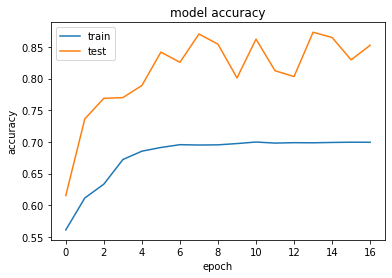

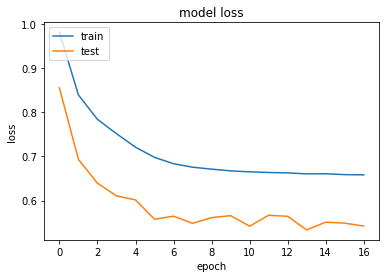

In [47]:
import matplotlib.pyplot as plt 

#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The reason that the plot is like this, is since the training data and validation data don't correspond. Since we altered some points in the data. This is one of the problems we create by using Relabeling

# Balanced Residuals

In [48]:
import numpy as np

y_pred_val   = np.argmax(fairmodel.predict(X_val), axis=-1)
y_hats_val   = pd.DataFrame(data = y_pred_val, columns=['y_pred_val'], index=x_val.index.copy())

In [49]:
regular_out = pd.merge(x_compas_new2, y_hats_val, how='left', left_index=True, right_index=True )

regular_out["y_val"] = y_val

display(regular_out)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
7,50855,1,1,1,1,1,1,1,1,1,4,1,0.0,High
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
22,50853,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
31,50843,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39826,62449,2,1,2,1,1,1,2,2,1,2,1,NaN,NaN
32608,60327,2,2,2,1,1,1,2,2,1,1,1,NaN,NaN
8944,53416,2,2,2,1,1,1,2,2,1,2,1,NaN,NaN
10813,53969,2,1,2,1,1,1,2,2,1,1,1,1.0,Low


In [50]:
cleanup_nums1 = {"y_val": {"Low":0, "Medium":1, "High":2}, 
                 "y_pred_val": {1.0:0, 2.0:1, 0.0:2}}

regular_out = regular_out.replace(cleanup_nums1)
display(regular_out)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
7,50855,1,1,1,1,1,1,1,1,1,4,1,2.0,2.0
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
22,50853,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
31,50843,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39826,62449,2,1,2,1,1,1,2,2,1,2,1,NaN,NaN
32608,60327,2,2,2,1,1,1,2,2,1,1,1,NaN,NaN
8944,53416,2,2,2,1,1,1,2,2,1,2,1,NaN,NaN
10813,53969,2,1,2,1,1,1,2,2,1,1,1,0.0,0.0


In [51]:
regular_AA = regular_out[regular_out["Ethnic_Code_Text"] == 1]
display(regular_AA)

regular_other = regular_out[regular_out["Ethnic_Code_Text"] == 2]
display(regular_other)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
7,50855,1,1,1,1,1,1,1,1,1,4,1,2.0,2.0
10,50850,1,2,1,1,1,1,1,1,5,2,1,NaN,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,1,NaN,NaN
22,50853,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
31,50843,1,1,1,1,1,1,1,1,1,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60805,62296,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN
60808,45932,1,1,1,1,1,1,1,3,1,3,2,NaN,NaN
60811,24873,1,1,1,1,1,1,1,1,1,4,2,2.0,2.0
60817,44498,1,1,1,2,1,1,2,2,1,3,2,NaN,NaN


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_pred_val,y_val
14674,49551,1,2,2,1,1,1,1,1,1,4,2,NaN,NaN
23476,57568,2,1,2,1,1,1,2,2,1,1,1,NaN,NaN
32197,33539,2,1,2,1,1,1,2,2,3,1,1,NaN,NaN
802,51059,1,1,2,1,1,1,1,1,1,1,1,NaN,NaN
53491,66415,1,1,2,1,1,1,1,3,6,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39826,62449,2,1,2,1,1,1,2,2,1,2,1,NaN,NaN
32608,60327,2,2,2,1,1,1,2,2,1,1,1,NaN,NaN
8944,53416,2,2,2,1,1,1,2,2,1,2,1,NaN,NaN
10813,53969,2,1,2,1,1,1,2,2,1,1,1,0.0,0.0


In [52]:
regular_other_ypredval = regular_other["y_pred_val"]
regular_other_ytrueval = regular_other["y_val"]

regular_AA_ypredval = regular_AA["y_pred_val"]
regular_AA_ytrueval = regular_AA["y_val"]

regular_other_ypredval = regular_other_ypredval.dropna()
regular_other_ytrueval = regular_other_ytrueval.dropna()

regular_AA_ypredval = regular_AA_ypredval.dropna()
regular_AA_ytrueval = regular_AA_ytrueval.dropna()

display(regular_other_ypredval)
display(regular_other_ytrueval)
display(regular_AA_ypredval)
display(regular_AA_ytrueval)

41635    0.0
4453     1.0
57235    0.0
50002    0.0
14602    0.0
        ... 
6613     1.0
55549    0.0
57337    0.0
7003     1.0
10813    0.0
Name: y_pred_val, Length: 1847, dtype: float64

41635    0.0
4453     1.0
57235    0.0
50002    0.0
14602    0.0
        ... 
6613     1.0
55549    0.0
57337    1.0
7003     1.0
10813    0.0
Name: y_val, Length: 1847, dtype: float64

7        2.0
73       0.0
97       0.0
127      2.0
175      0.0
        ... 
60670    0.0
60691    0.0
60709    2.0
60796    1.0
60811    2.0
Name: y_pred_val, Length: 1757, dtype: float64

7        2.0
73       0.0
97       0.0
127      2.0
175      0.0
        ... 
60670    0.0
60691    0.0
60709    2.0
60796    0.0
60811    2.0
Name: y_val, Length: 1757, dtype: float64

In [53]:
# TRUE - PRED
val_dif_ro = (regular_other_ytrueval - regular_other_ypredval).sum()
print(val_dif_ro)

residuals_ro = val_dif_ro / 1847 #change number size to val set size (eth = 2)
print(residuals_ro)

93.0
0.050351922035733625


In [54]:
# TRUE - PRED
val_dif_rAA = (regular_AA_ytrueval - regular_AA_ypredval).sum()
print(val_dif_rAA)

residuals_rAA = val_dif_rAA / 1757 #change number size to val set size (eth = 1)
print(residuals_rAA)


457.0
0.26010244735344334


In [55]:
discrimination_balanced_residuals_regular = residuals_rAA - residuals_ro

print(discrimination_balanced_residuals_regular)


0.2097505253177097
